In [18]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

In [19]:
cars = pd.read_csv("C:\\Users\\antho\\Documents\\Data Science\\Data\\cars_datasets.csv")

In [20]:
cars.shape

(2499, 13)

In [21]:
cars.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [22]:
# Check for null values
cars.isnull().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [23]:
cars.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [24]:
cars.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [25]:
cars['price'].mean()

18767.671468587436

In [26]:
cars['brand'].value_counts()

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
buick                13
kia                  13
honda                12
infiniti             12
mercedes-benz        10
cadillac             10
heartland             5
land                  4
audi                  4
peterbilt             4
acura                 3
lincoln               2
mazda                 2
lexus                 2
harley-davidson       1
ram                   1
toyota                1
maserati              1
jaguar                1
Name: brand, dtype: int64

In [27]:
car_avgprice = cars.groupby(['brand','model'])['price'].mean()
car_avgprice

brand      model  
acura      door        2450.0
           mdx        16900.0
audi       5          36400.0
           door          12.5
           q5         19500.0
                       ...   
nissan     xd         36300.0
           xterra      6700.0
peterbilt  truck        400.0
ram        door       11050.0
toyota     cruiser     6300.0
Name: price, Length: 180, dtype: float64

In [28]:
# Minimum price is $0. Will replace with mean.
mean_price = cars['price'].mean()
cars['price'].replace(0, mean_price, inplace=True)

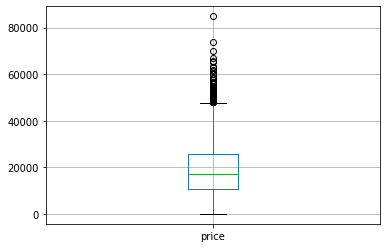

In [29]:
cars.boxplot(['price'])

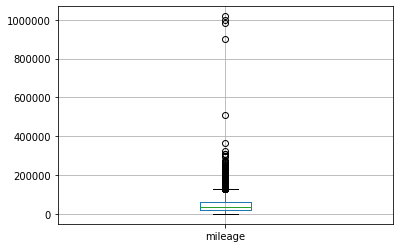

In [30]:
cars.boxplot(['mileage'])

In [31]:
car_models = cars.groupby(['brand','model']).size().sort_values(ascending=False).head(10)
print(car_models)

brand      model  
ford       door       363
           f-150      219
dodge      caravan    102
chevrolet  door        99
ford       doors       97
dodge      door        68
ford       fusion      65
dodge      durango     64
           journey     61
nissan     rogue       54
dtype: int64


In [35]:
car_brands = cars['brand'].value_counts().head(10)
print(car_brands)

ford         1235
dodge         432
nissan        312
chevrolet     297
gmc            42
jeep           30
chrysler       18
bmw            17
hyundai        15
buick          13
Name: brand, dtype: int64


In [12]:
#reviews.groupby('points').points.count()
cars.groupby('brand').brand.count()

brand
acura                 3
audi                  4
bmw                  17
buick                13
cadillac             10
chevrolet           297
chrysler             18
dodge               432
ford               1235
gmc                  42
harley-davidson       1
heartland             5
honda                12
hyundai              15
infiniti             12
jaguar                1
jeep                 30
kia                  13
land                  4
lexus                 2
lincoln               2
maserati              1
mazda                 2
mercedes-benz        10
nissan              312
peterbilt             4
ram                   1
toyota                1
Name: brand, dtype: int64

In [7]:
#reviews.groupby(['country']).price.agg([len, min, max])
car_brand_mean = cars.groupby(['brand']).price.agg([len, np.mean])
print(car_brand_mean)

                  len          mean
brand                              
acura               3   7266.666667
audi                4  13981.250000
bmw                17  26397.058824
buick              13  19715.769231
cadillac           10  24941.000000
chevrolet         297  18669.952862
chrysler           18  13686.111111
dodge             432  17781.988426
ford             1235  21666.888259
gmc                42  10657.380952
harley-davidson     1  54680.000000
heartland           5   2966.000000
honda              12   6127.500000
hyundai            15   5203.200000
infiniti           12  13098.333333
jaguar              1   2800.000000
jeep               30  10933.833333
kia                13  11123.846154
land                4  28900.000000
lexus               2  33220.000000
lincoln             2  18150.000000
maserati            1  30300.000000
mazda               2   8000.000000
mercedes-benz      10  28704.000000
nissan            312  12065.820513
peterbilt           4    400

In [11]:
top5_brand_mean = car_brand_mean.sort_values(by='len', ascending=False).head()
print(top5_brand_mean)

            len          mean
brand                        
ford       1235  21666.888259
dodge       432  17781.988426
nissan      312  12065.820513
chevrolet   297  18669.952862
gmc          42  10657.380952


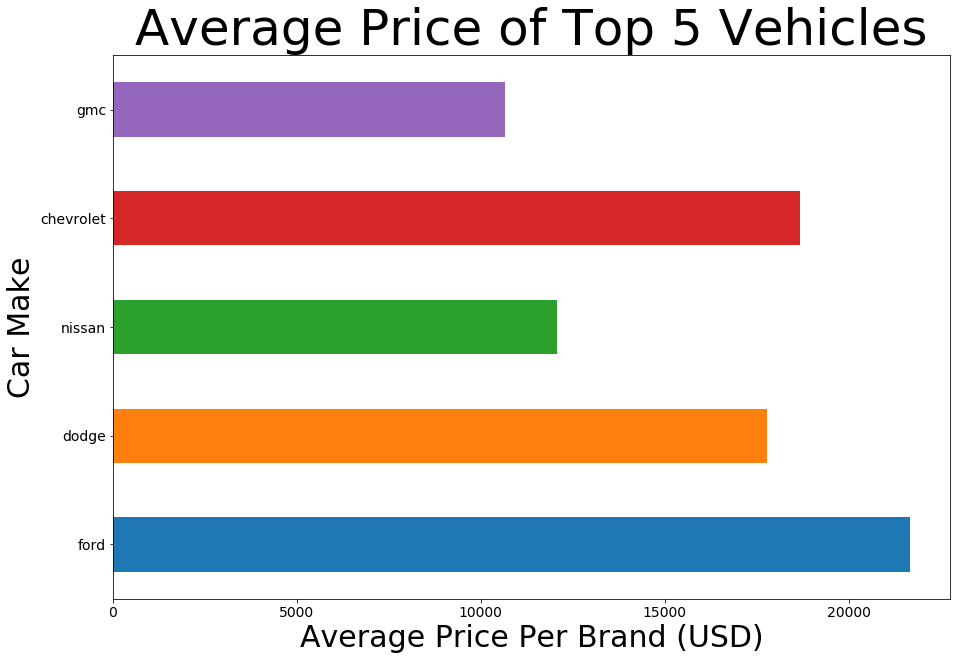

In [12]:
top5_brand_mean['mean'].plot(kind='barh', figsize=(15,10), color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])
plt.title('Average Price of Top 5 Vehicles', fontsize=50)
plt.ylabel('Car Make', fontsize=30)
plt.yticks(fontsize=14)
plt.xlabel('Average Price Per Brand (USD)', fontsize=30)
plt.xticks(fontsize=14)
plt.show()

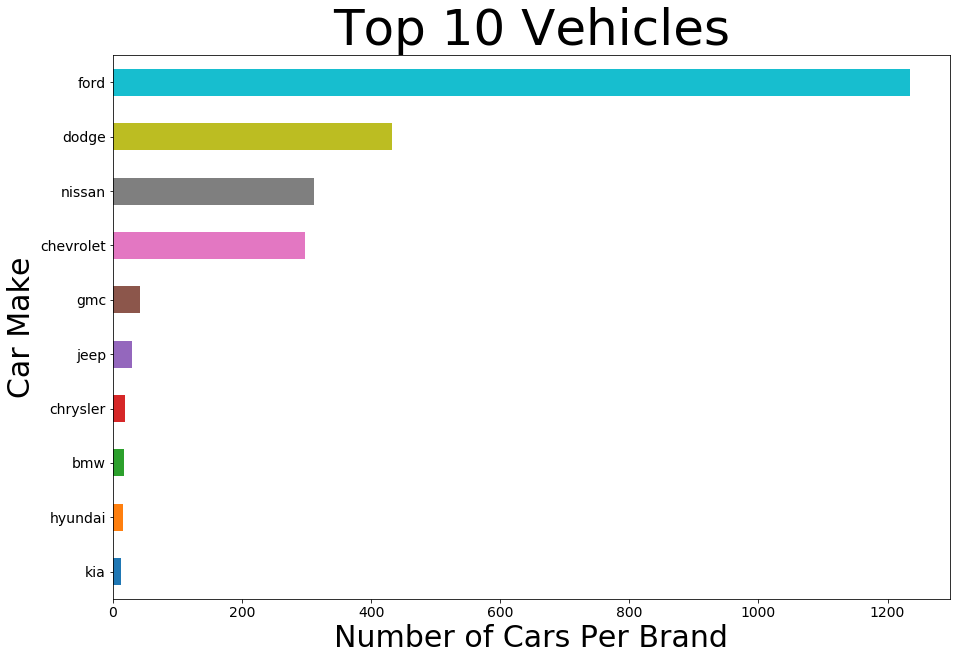

In [96]:
car_brands.sort_values(ascending=True).plot(kind='barh', figsize=(15,10), color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])
plt.title('Top 10 Vehicles', fontsize=50)
plt.ylabel('Car Make', fontsize=30)
plt.yticks(fontsize=14)
plt.xlabel('Number of Cars Per Brand', fontsize=30)
plt.xticks(fontsize=14)
plt.show()

In [62]:
car_year = cars['year'].value_counts().head(10)
print(car_year)

2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
Name: year, dtype: int64


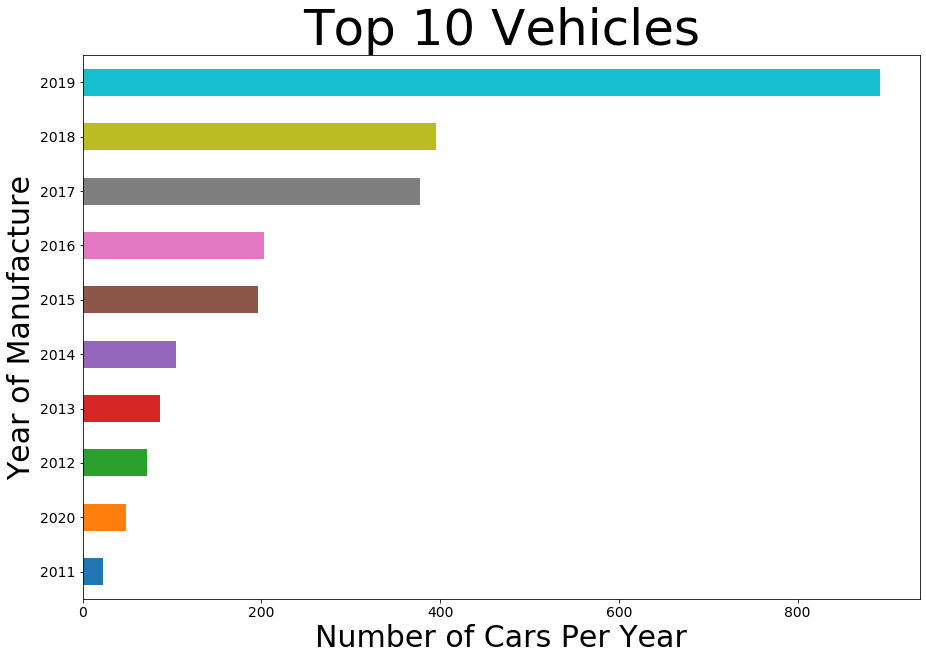

In [60]:
car_year.sort_values(ascending=True).plot(kind='barh', figsize=(15,10), color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])
plt.title('Top 10 Vehicles', fontsize=50)
plt.ylabel('Year of Manufacture', fontsize=30)
plt.yticks(fontsize=14)
plt.xlabel('Number of Cars Per Year', fontsize=30)
plt.xticks(fontsize=14)
plt.show()

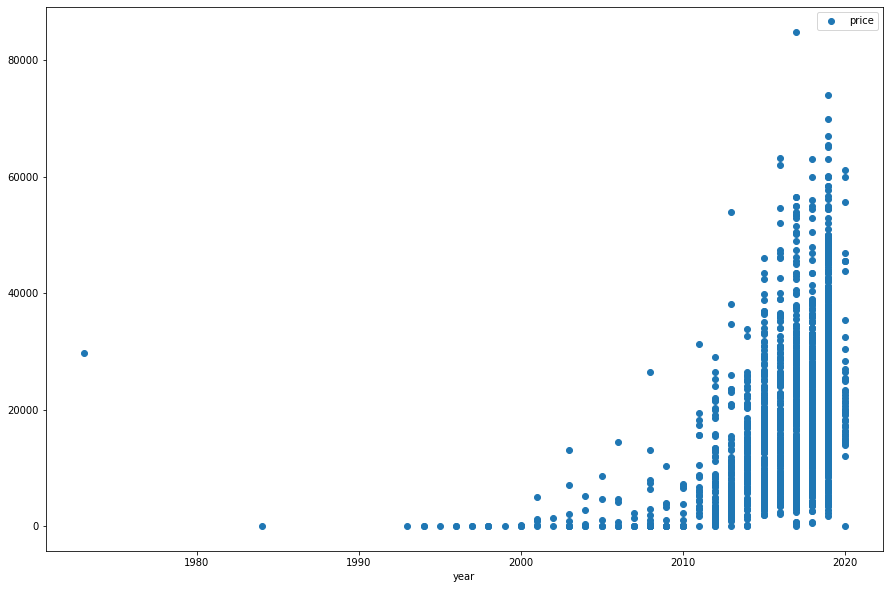

In [54]:
cars.plot(x='year', y='price', style='o', figsize=(15,10))
plt.show()

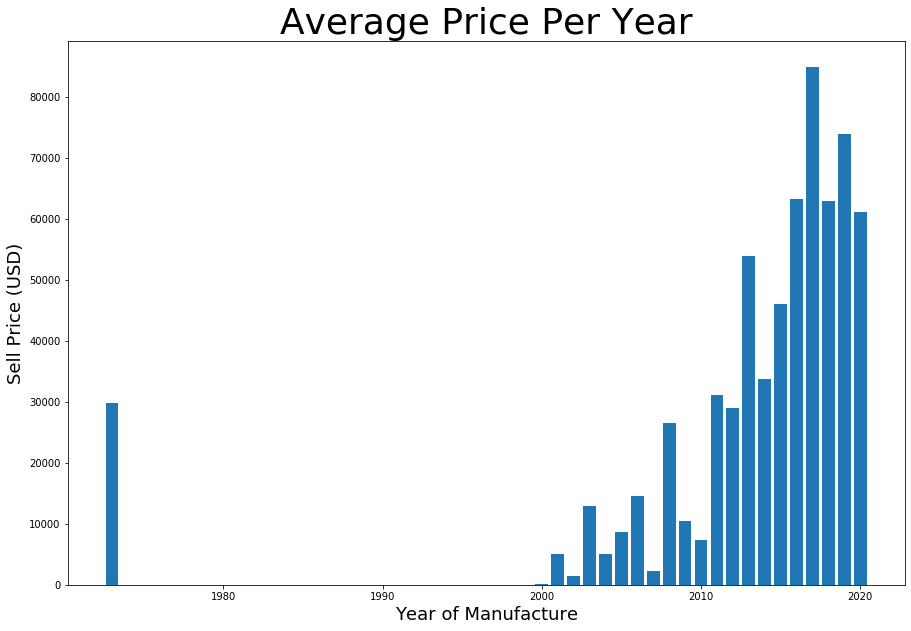

In [57]:
plt.figure(figsize=(15,10))
plt.bar(cars['year'], cars['price'])
plt.title('Average Price Per Year', fontsize=36)
plt.ylabel('Sell Price (USD)', fontsize=18)
plt.xlabel('Year of Manufacture', fontsize=18)
plt.show()

In [85]:
old_car = cars.year < 1990
cars[old_car]

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
32,32,29800,chevrolet,camaro,1973,clean vehicle,46226.0,red,1q87t3n166389,167763370,pennsylvania,usa,22 hours left
405,405,25,ford,door,1984,salvage insurance,41577.0,white,2ftcf15y9eca14589,167611661,arkansas,usa,17 hours left


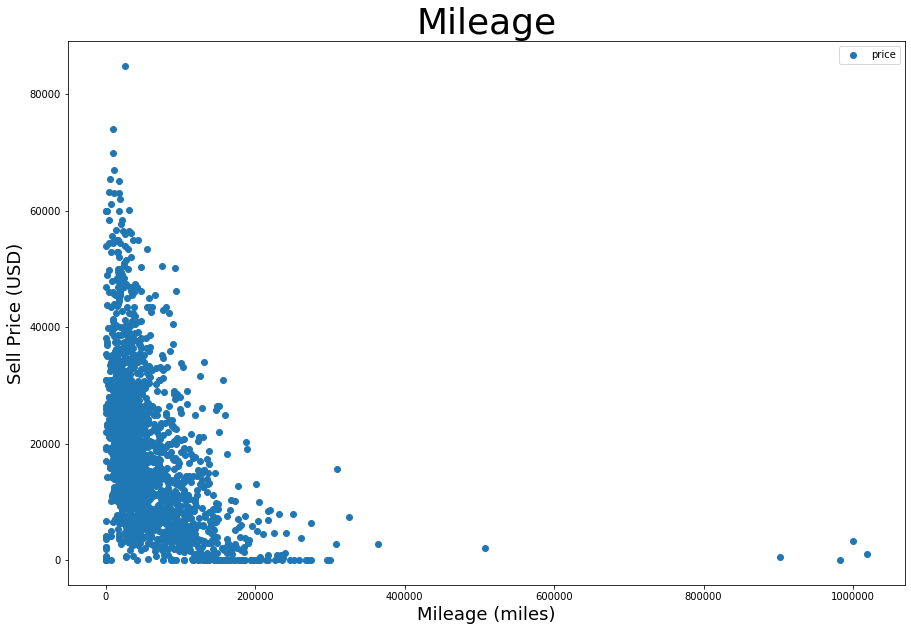

In [83]:
cars.plot(x='mileage', y='price', style='o', figsize=(15,10))
plt.title('Mileage', fontsize=36)
plt.ylabel('Sell Price (USD)', fontsize=18)
plt.xlabel('Mileage (miles)', fontsize=18)
plt.show()

In [65]:
cars.corr()

,Unnamed: 0,price,year,mileage,lot
Unnamed: 0,1.000000,0.098417,0.244921,-0.129258,0.012577
price,0.098417,1.000000,0.418274,-0.400838,0.159369
year,0.244921,0.418274,1.000000,-0.594686,0.164582
mileage,-0.129258,-0.400838,-0.594686,1.000000,-0.130475
lot,0.012577,0.159369,0.164582,-0.130475,1.000000


In [10]:
miles = cars['mileage']
price = cars['price']
x = np.array(miles).reshape(-1, 1)
y = np.array(price)

In [11]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=47)

In [12]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
pred = regressor.predict(xtest)

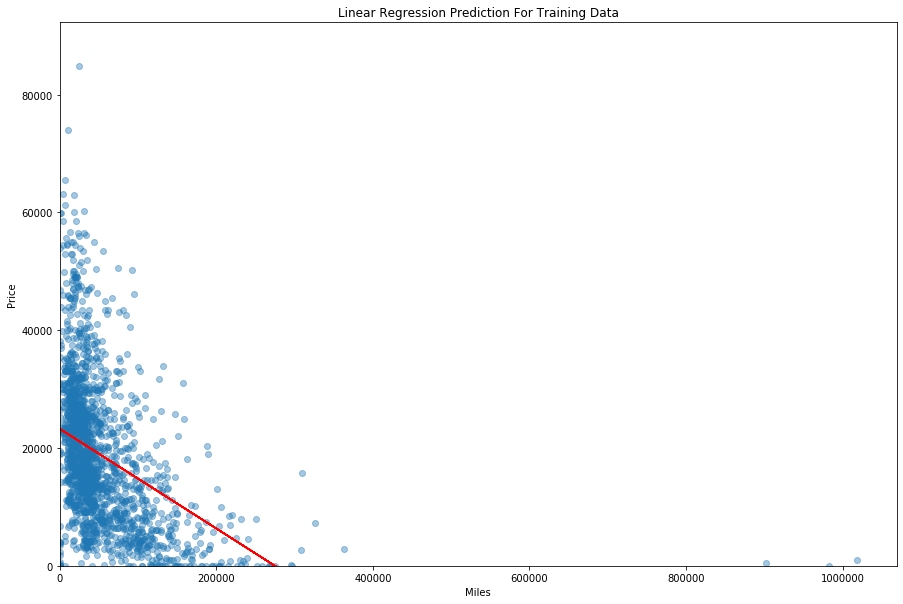

In [14]:
plt.figure(figsize=(15,10))
plt.scatter(xtrain, ytrain, alpha='0.4')
plt.plot(xtrain, regressor.predict(xtrain), color = 'red')
plt.title("Linear Regression Prediction For Training Data")
plt.xlabel("Miles")
plt.xlim(xmin=0)
plt.ylabel("Price")
plt.ylim(ymin=0)
plt.show()

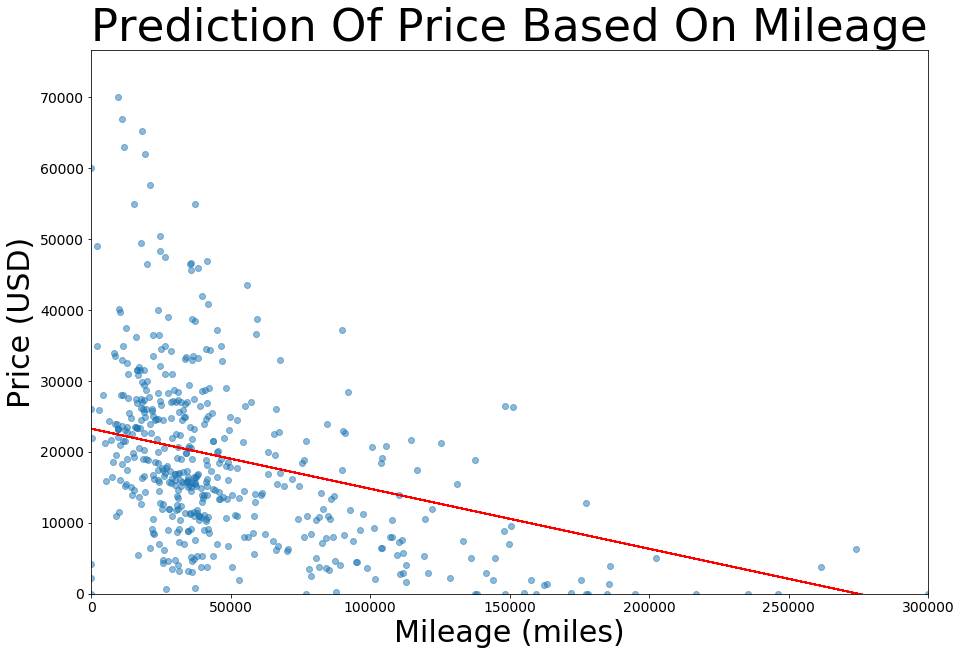

In [40]:
plt.figure(figsize=(15,10))
plt.scatter(xtest, ytest, alpha='0.5')
plt.plot(xtrain, regressor.predict(xtrain), color = 'red')
plt.title("Prediction Of Price Based On Mileage", fontsize=45)
plt.xlabel("Mileage (miles)", fontsize=30)
plt.xlim(xmin=0, xmax = 300000)
plt.xticks(fontsize=14)
plt.ylabel("Price (USD)", fontsize=30)
plt.ylim(ymin=0)
plt.yticks(fontsize=14)
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [17]:
# Create model
model = LinearRegression()

# Fit model / Train model
model.fit(xtrain, ytrain)

# Make predictions using model on training data
y_pred_train = model.predict(xtrain)

# Make predictions using model on testing data
y_pred_test = model.predict(xtest)

# Evaluate model performance
print("Training Accuracy = ", r2_score(ytrain, y_pred_train))
print("Testing Accuracy = ", r2_score(ytest, y_pred_test))

Training Accuracy =  0.1659409466955729
Testing Accuracy =  0.13684349907215143
